In [10]:
import pandas as pd
import math
GE_years = [1988,1991,1997,2001,2006,2011,2015,2020]


In [18]:
year = 1988

uncontested_seats = pd.DataFrame({'Year':[],'Uncontested Seats':[]})

for year in GE_years:
    ## Set up dataframe
    file_path = 'Actual_results/'+ str(year)+'-Table 1.csv'
    df = pd.read_csv(file_path)

    # Remove empty rows and columns
    df = df.dropna(how='all').dropna(axis=1, how='all')

    df.columns = df.iloc[0]
    df = df[1:]

    # Reset the index
    df.reset_index(drop=True, inplace=True)


    ## Data Cleaning 

    # Fill up rows, which dont have Constituency and Seats, with the respective constituency and seats
    for i in range(1, len(df)):
        if pd.isna(df.at[i, df.columns[0]]):

            df.iloc[i][0] = df.iloc[i-1][0]
            df.iloc[i][1] = df.iloc[i-1][1]

    # Remove SMCs
    df = df[df['Seats'] != '1']

    df['Seats'] = df['Seats'].astype(int)
    
    uncontested_seats_sum = df.loc[df['Votes'] == "Uncontested", 'Seats'].sum()
    new_row = pd.DataFrame({'Year': [year], 'Uncontested Seats': [uncontested_seats_sum]})

    uncontested_seats = pd.concat([uncontested_seats, new_row], ignore_index=True)




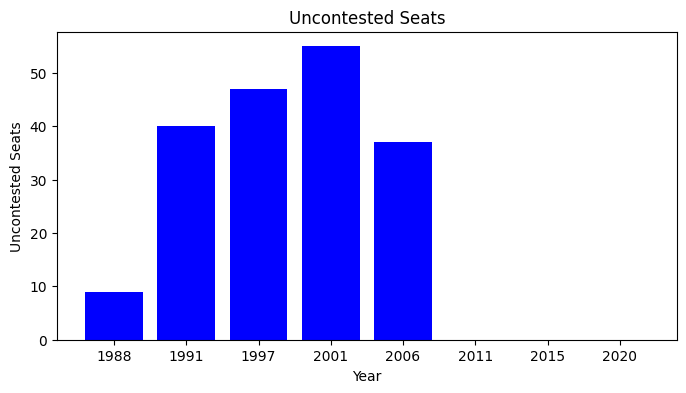

In [28]:
import matplotlib.pyplot as plt

df = uncontested_seats
df['Year'] = df['Year'].astype(str)
df['Year']=df['Year'].str[:4]
plt.figure(figsize=(8, 4))
plt.bar(df['Year'], df['Uncontested Seats'], color='blue')

plt.xlabel('Year')
plt.ylabel('Uncontested Seats')
plt.title('Uncontested Seats')
plt.xticks(df['Year'])  # Ensure all years are shown on the x-axis
plt.show()